# Pseudo One-Time Pad
### Author: Kaitlyn Leta

### Overview
For this project, I needed to write a Pseudo One-Time Pad program. The picture below is an example of the structure I used in my code, taken from the slides in our class. 

Basically, I needed to first figure out how to get a PRG key from n bits to p bits. Once I figured out how to produce the pseudo key, I then was able to XOR this key with the message. Once the XOR is completed, this would produce the ciphertext. If I wanted to decrypt the message, I would XOR the ciphertext with the key once again to get the original message back. This is the general overview of what my code does below. 

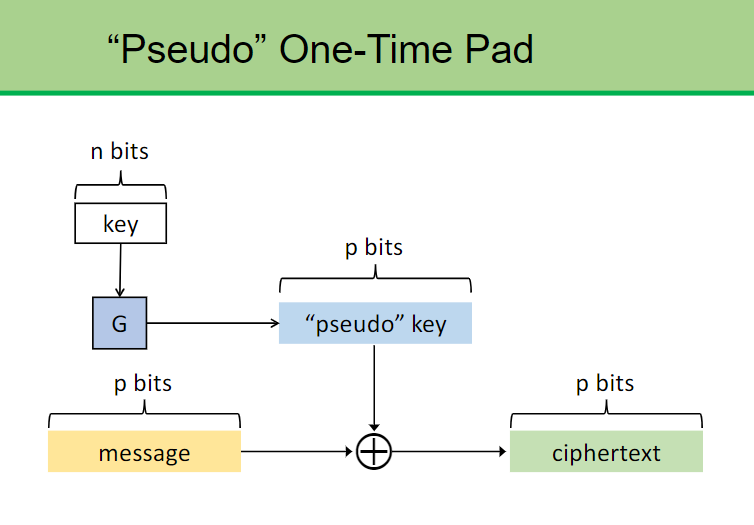

### PRG
For this project, I found a fucntion that utilizes the strong crypto random generator that allowed me to set the length of the output. This function was not my own writing and is sourced below. I used the secrets.py library to generate cryptographically strong random numbers within the rand_key(p) function to input the base key and output the pseudo key. 

In [1]:
# Author/Source: https://www.geeksforgeeks.org/python-program-to-generate-random-binary-string/
# Python program for random 
# binary string generation 
  
import secrets 
  
# Function to create the 
# random binary string 
def rand_key(p): 
    
    # Variable to store the  
    # string 
    keyp = "" 
  
    # Loop to find the string 
    # of desired length 
    for i in range(p): 
          
        # randint function to generate 
        # 0, 1 randomly and converting  
        # the result into str 
        # used the secrets library for cryptography strong random numbers
        temp = str(secrets.randbelow(1))
        
        # Concatenatin the random 0, 1 
        # to the final result 
        keyp += temp 
          
    return(keyp) 

### Message and Key formation
Here I ask for the message through input and request it is in binary. Once given the message m, I use the random generator above to get my pseudo key. Then I print the key, pseudo key and the message. 

Example Input: 0100100001100101011011000110110001101111

Translation of Input: Hello

In [2]:
# Message m populated by user input
m = "0100100001100101011011000110110001101111"

#m = input('Enter the binary message (no spaces) to encrypt: ')

# Length of the message m
nBits = len(m)
print("Key:\t    ", nBits)

# PRG generates the pseudo key (pBits)
pBits = rand_key(nBits) 
print("Pseudo key: ", pBits)
print("m:\t    ", m)

Key:	     40
Pseudo key:  0000000000000000000000000000000000000000
m:	     0100100001100101011011000110110001101111


### Encryption of Message 

Enc(key XOR msg)

In [3]:
# The message m and pseudo key pKey are transformed into strings
msg = str(m)
pKey = str(pBits)

# The msg and pKey are then XORed using the "^" bitwise function
# Then they are formed using bin() function so that the numbers display as full binaries
c = int(msg,2) ^ int(pKey,2)
print ("Ciphertext: " ,bin(c)[2:].zfill(len(msg)))

Ciphertext:  0100100001100101011011000110110001101111


### Decryption of Ciphertext

Dec(key XOR ciphertext)

In [4]:
# The ciphertext is transformed to a string so that it can perform the bitwise calculation.
ct = str(c)

# d is the bitwise XOR of the pseudo key and the ciphertext
# Then d is used in python's bin() function to display the number as a full binary
d = int(pKey,2) ^ int(ct)
decryption = bin(d)[2:].zfill(len(pKey))

# This is a safe check to make sure the message was decrypted correctly before displaying the message
if(decryption == msg):
    print ("Successful Decryption")
    print ("Decrypted Message: " ,decryption)
else:
    print("Failed Decryption")

Successful Decryption
Decrypted Message:  0100100001100101011011000110110001101111


### Binary to Text or Decimal of decrypted message

In [5]:
# Function that converts Binary to Decimal  
def binaryToDecimal(n): 
    return int(n,2) 

In [6]:
# Splits long binary message into 8 bits so that it can translate into characters. 
if len(decryption) >= 8:  
    eightBitChunks = 8
    prepMsg = [decryption[i:i+eightBitChunks] for i in range(0, len(decryption), eightBitChunks)]
    print(prepMsg)
    
    # Uses the binaryToDecimal() function above and python's built in chr() function to translate the decimal value to ASCII. 
    # Loops through the prepped message "prepMsg" and prints the ASCII characters together to form a word.
    for i in prepMsg:
        print(chr(binaryToDecimal(i)), end = '')
# If message is less than 8 bits, the message will be translated to decimal and printed
else:
    print(binaryToDecimal(decryption))

['01001000', '01100101', '01101100', '01101100', '01101111']
Hello